In [14]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

[00:54:11] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


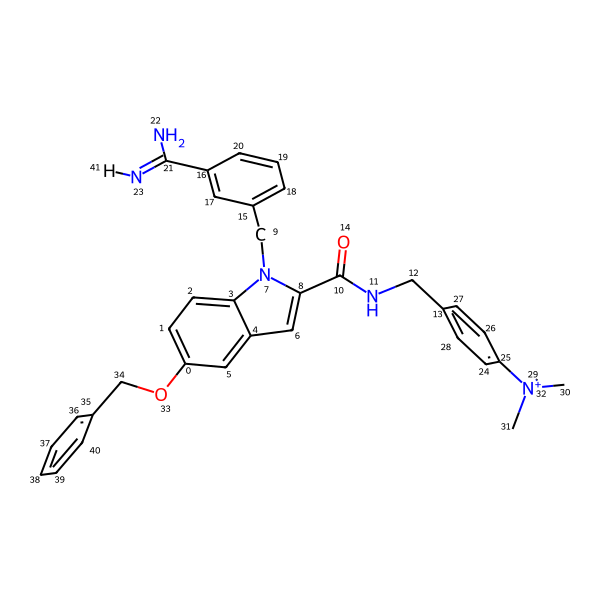

In [15]:
IPythonConsole.ipython_useSVG = True    
IPythonConsole.drawOptions.addAtomIndices = True    
IPythonConsole.molSize = 600, 600     

ligand = Chem.MolFromMolFile("sdf_ligands/IMA_ideal.sdf")             # by default removeHs = True
ligand

[00:56:04] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


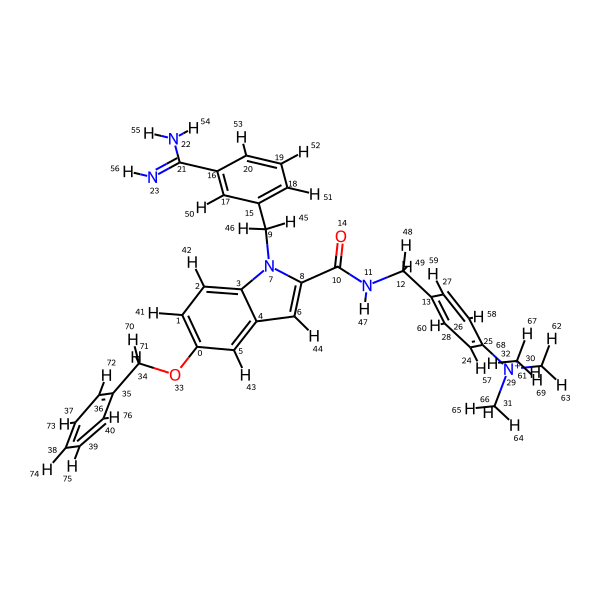

In [20]:
mod_ligand_OH = Chem.MolFromMolFile("sdf_ligands/IMA_ideal.sdf", removeHs = False)
mod_ligand_OH

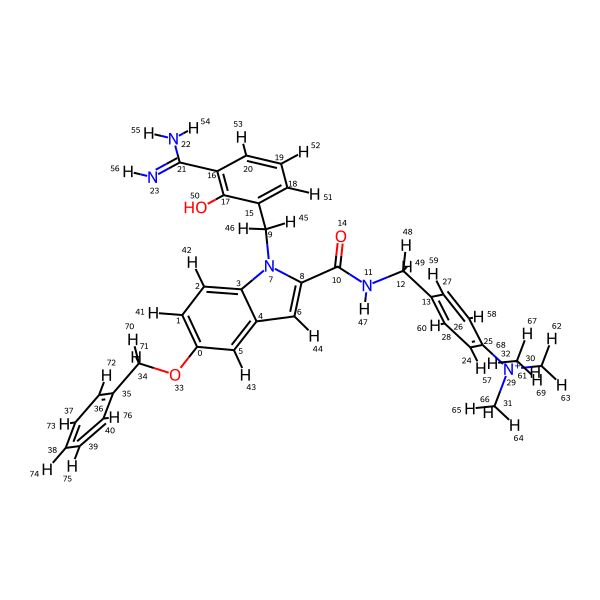

In [21]:
# convert Hydrogen-50 to an Oxygen
atom = mod_ligand_OH.GetAtomWithIdx(50)     # Select atom Hydrogen-50
atom.SetAtomicNum(8)     # Change the atom to oxygen
# as Oxygen is heteroatom, dy default 1 Hydrogen atom will be added with Oxygen

mod_ligand_OH

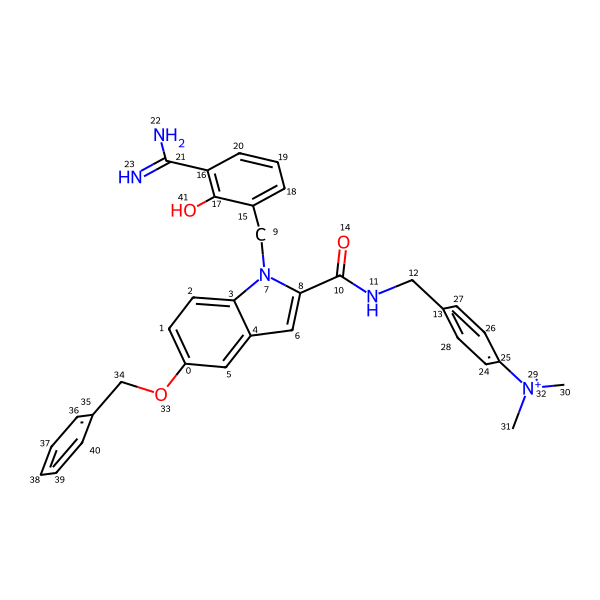

In [22]:
mod_ligand_OH = Chem.RemoveAllHs(mod_ligand_OH)
mod_ligand_OH

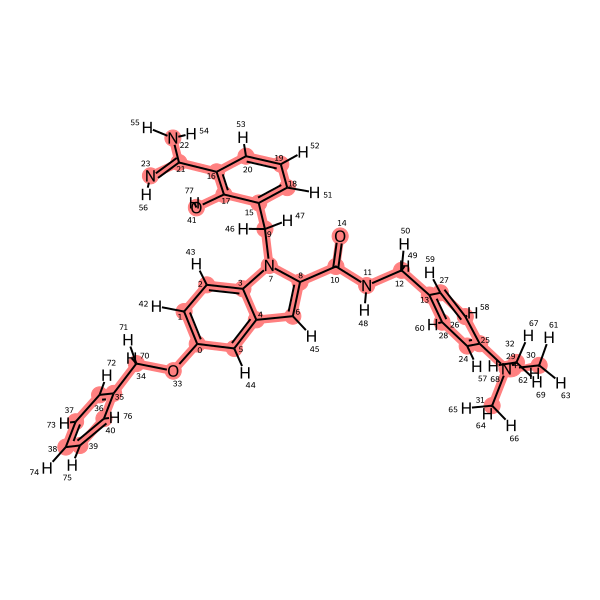

In [23]:
# Optimize new molecule
from rdkit.Chem import AllChem

Chem.SanitizeMol(mod_ligand_OH)    # to restore the aromatic Kekule structure 
mod_ligand_OH_H = Chem.AddHs(mod_ligand_OH)

constrained_mol = AllChem.ConstrainedEmbed(mod_ligand_OH_H, mod_ligand_OH, useTethers = True)
constrained_mol

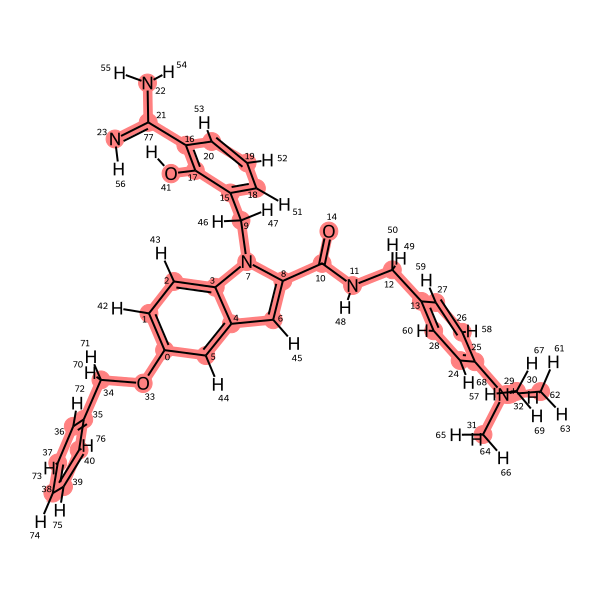

In [24]:
opt_OH = AllChem.MMFFOptimizeMolecule(mod_ligand_OH_H)
mod_ligand_OH_H

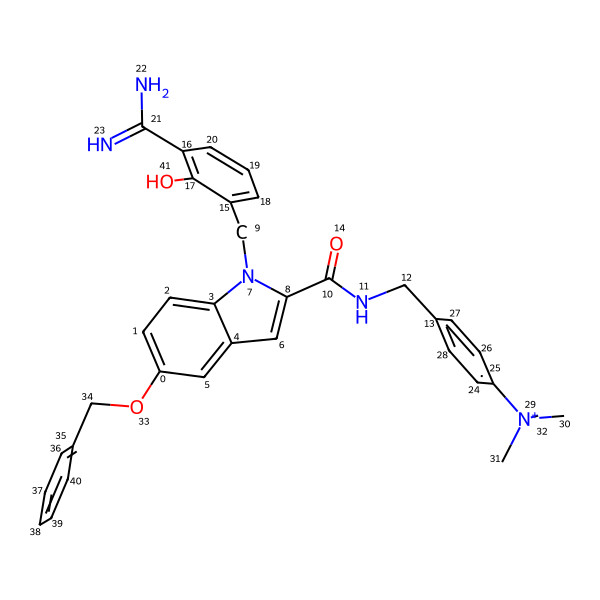

In [25]:
Chem.RemoveAllHs(mod_ligand_OH_H)

In [26]:
# save to new file
import os

IMA_ligand_H = Chem.MolFromMolFile("sdf_ligands/IMA_ideal.sdf", removeHs = False)

# save modified ligands sdf file - make sure all contain hydrogens 
Chem.MolToMolFile(IMA_ligand_H, 'ligands_to_dock/IMA.sdf')
Chem.MolToMolFile(mod_ligand_OH_H, 'ligands_to_dock/IMA_modified_OH.sdf')

[01:13:11] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
